<a href="https://colab.research.google.com/github/dayekb/Study/blob/main/rus/UrFU/%D0%98%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B%20%D0%B8%20%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8%20%D0%B2%20%D0%BC%D0%B5%D0%B4%D0%B8%D1%86%D0%B8%D0%BD%D0%B5/2%20%D1%81%D0%B5%D0%B7%D0%BE%D0%BD/%D0%91%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D1%8B%20(ipynb)/ML_2_6_1_Neural_Networks_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импортируем библиотеки

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('dark_background')

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Набор данных CIFAR с 10 классами

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
target_names=np.array(['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck'])

**Размерность набора данных**

In [ ]:
train_images.shape

(50000, 32, 32, 3)

Нормировка

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# Простая Полносвязная Нейронная Сеть






In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32,3)))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(10))
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                98336     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 99,034
Trainable params: 99,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), 
                    epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8516 - accuracy: 0.3408 - val_loss: 1.8505 - val_accuracy: 0.3401
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8333 - accuracy: 0.3471 - val_loss: 1.8284 - val_accuracy: 0.3514
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8166 - accuracy: 0.3529 - val_loss: 1.8110 - val_accuracy: 0.3527
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8008 - accuracy: 0.3589 - val_loss: 1.7945 - val_accuracy: 0.3560
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7861 - accuracy: 0.3638 - val_loss: 1.7877 - val_accuracy: 0.3618
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7725 - accuracy: 0.3678 - val_loss: 1.7656 - val_accuracy: 0.3678
Epoch 7/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.7598 - accuracy: 0.3730 - val_loss: 1.7640 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.8629 - accuracy: 0.3304 - 510ms/epoch - 2ms/step

Test accuracy: 0.3303999900817871


# **Истории по Эпохам**

In [ ]:
def plot_history(histories,y_min,y_max):   
    plt.figure(figsize=(20,10))
    plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10,)
    plotter.plot(histories)
    plt.ylim([y_min, y_max])

In [ ]:
histories = {}

In [ ]:
histories['Dense NN'] = history

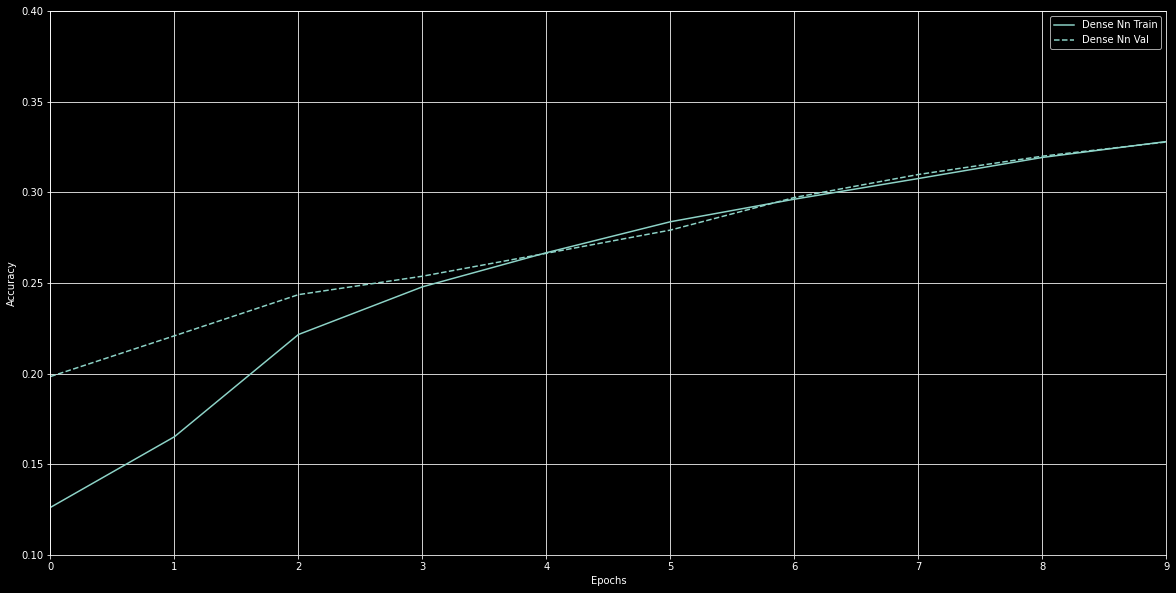

In [ ]:
plot_history(histories,0.1,0.4)

# **Анализируем Результат**

Предсказание Модели

Непонятные цифры

In [ ]:
prediction = model.predict(test_images)
prediction[0]

array([-0.59309   , -0.2115823 ,  0.41721112,  0.8698612 ,  0.08799416,
        0.8959944 ,  0.7640112 , -0.46981457, -0.56543386, -1.2322279 ],
      dtype=float32)

С помощью функции SoftMax - нормализуем предсказания

Так хоть адекватнеей выглядит (хотя формально шаг можно пропустить)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
prediction = probability_model.predict(test_images)
prediction[0]

array([0.04442359, 0.06505795, 0.1220062 , 0.19185156, 0.08778187,
       0.19693135, 0.17258191, 0.05025179, 0.04566933, 0.02344443],
      dtype=float32)

In [ ]:
target_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

Находим индекс соответсвующий максимуму предсказания

In [ ]:
label_predict=np.argmax(prediction,axis=1)
target_names[label_predict[0]]

'dog'

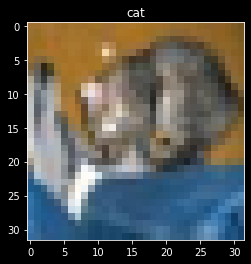

In [ ]:
plt.imshow(test_images[0])
plt.title(target_names[test_labels[0][0]]);

посмотрим не только лучшее предсказание, а отсортируем возможные классы по "уверенности"

In [ ]:
target_names[np.argsort(prediction[0])[::-1]]

array(['dog', 'cat', 'frog', 'bird', 'deer', 'automobile', 'horse',
       'ship', 'airplane', 'truck'], dtype='<U10')

# **Матрица Ошибок**

In [ ]:
def plot_confusion_matrix(y_true,y_predict,labels):
    confusion_mtx = tf.math.confusion_matrix(y_true, y_predict,) 
    confusion_mtx=np.round(confusion_mtx/np.sum(confusion_mtx,axis=1),2)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, xticklabels=labels, yticklabels=labels, 
                annot=True, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Label')
    return confusion_mtx

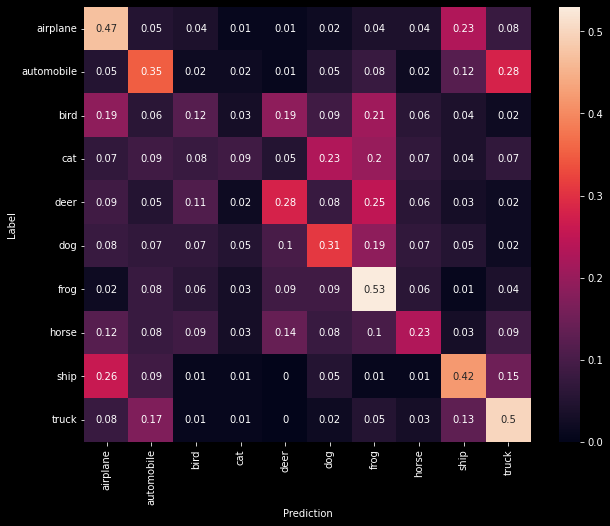

In [ ]:
cm=plot_confusion_matrix(test_labels,label_predict,target_names)

# Сохраняем модель

Сохраняем модель в 1 строку


In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

Загружаем модель в 1 строку


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                98336     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 99,034
Trainable params: 99,034
Non-trainable params: 0
_________________________________________________________________


# Задание

Используя манипуляции с архитектурой полносвязной нейронной сети (количество слоев, количество нейронов в слое,  [функции активации](https://www.tensorflow.org/api_docs/python/tf/keras/activations), количество эпох обучения, и т.д.) добейтесь точности на валидационной выборке не менее 0.45

**Подсказка**: ReLU сила, сигмоид могила
